1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/
import pandas as pd
import numpy as np
import datetime as dt

file_name = "./data_000637.txt"
data = pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
#Task 1
#First let's see how many rows dataframe has, even it is written above when we call the function
num_r=len(data)
print("Number of rows: " , num_r)
#we have to choose number of rows that are higher than 10k,but less than maximum 1310720
N=99999
df=data.loc[0:N]
df


Number of rows:  1310720


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
99995,1,0,64,3869201161,2378,29
99996,1,0,70,3869201161,2472,26
99997,1,0,58,3869201161,2558,0
99998,1,0,57,3869201161,2561,23


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [4]:
#Task 2
max_bf=max(df['BX_COUNTER'])
print(max_bf)



3563


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [5]:
#Task 3
#Before adding new column, is it good to make a copy of existing dataframe and deal with it

dfa=df.copy()
dfa['Absolute time [ns]']=pd.Series(dfa['TDC_MEAS']*25/30 + dfa['BX_COUNTER']*25 +dfa['ORBIT_CNT']*max_bf*25 , index=dfa.index)
#print(dfa)
dfa['Absolute time [ns]']=dfa.iloc[:,6]-dfa.iloc[0,6]
print(dfa)


       HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0         1     0          123  3869200167        2374        26   
1         1     0          124  3869200167        2374        27   
2         1     0           63  3869200167        2553        28   
3         1     0           64  3869200167        2558        19   
4         1     0           64  3869200167        2760        25   
...     ...   ...          ...         ...         ...       ...   
99995     1     0           64  3869201161        2378        29   
99996     1     0           70  3869201161        2472        26   
99997     1     0           58  3869201161        2558         0   
99998     1     0           57  3869201161        2561        23   
99999     1     0           56  3869201161        2565        12   

       Absolute time [ns]  
0            0.000000e+00  
1            8.125000e-01  
2            4.476625e+03  
3            4.594125e+03  
4            9.649125e+03  
...            

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [6]:
#Task 4 
x=data['TDC_MEAS']*25/30 + data['BX_COUNTER']*25 +data['ORBIT_CNT']*25*max_bf
print('Time in seconds:', (x.iloc[len(x)-1]-x.iloc[0])*10**-9, 's')
print('Time in minutes:', (x.iloc[len(x)-1]-x.iloc[0])*10**-9/60, 'min')
print('Time in hours:', (x.iloc[len(x)-1]-x.iloc[0])*10**-9/360, 'h')



Time in seconds: 0.9801409933125 s
Time in minutes: 0.016335683221875 min
Time in hours: 0.0027226138703125 h


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [7]:
#Task 5
noise_channels=data.groupby('TDC_CHANNEL').count()
noise_channels

max_tdc_c=noise_channels['HEAD'].nlargest(3)
max_tdc_c

TDC_CHANNEL
139    108059
64      66020
63      64642
Name: HEAD, dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [8]:
#Task 6

non_empty=data.groupby('ORBIT_CNT').ngroups
print("Number of non-empty orbitas: \n",non_empty)

Number of non-empty orbitas: 
 11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [9]:
#Task 7
unique_orb_139=data[data['TDC_CHANNEL']==139]["ORBIT_CNT"].unique().shape[0]
print("Unique orbitas:\n",unique_orb_139)

Unique orbitas:
 10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [10]:
#Task 8

fpga0=data[data['FPGA']==0].groupby('TDC_CHANNEL').count()['FPGA']
print("FPGA0: \n", fpga0)
fpga1=data[data['FPGA']==1].groupby('TDC_CHANNEL').count()['FPGA']
print("FPGA0: \n", fpga1)


FPGA0: 
 TDC_CHANNEL
1       1215
2       1602
3       1493
4       2352
5       1432
       ...  
129        2
130       33
137       32
138       34
139    75617
Name: FPGA, Length: 124, dtype: int64
FPGA0: 
 TDC_CHANNEL
1      28438
2      32669
3      21970
4      26403
5      15003
       ...  
129       35
130       38
137       36
138       36
139    32442
Name: FPGA, Length: 132, dtype: int64


In [11]:
dfd=data.loc[:,['FPGA','TDC_CHANNEL']].set_index('FPGA')
dfd


,TDC_CHANNEL
FPGA,
0,123
0,124
0,63
0,64
0,64
...,...
0,62
1,4
0,64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

[Text(0.5, 0, 'TDC Channel'), Text(0.5, 1.0, 'FPGA 0')]

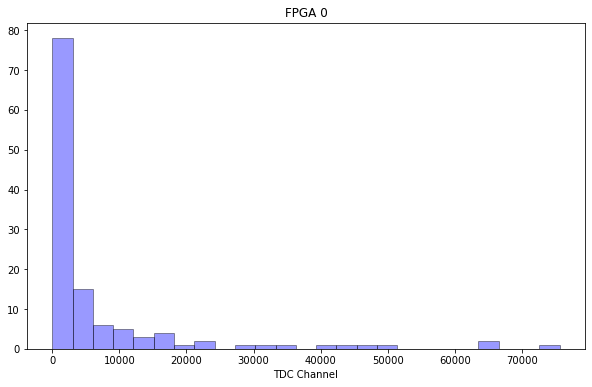

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6)) # create the figure
h, bins, _ = plt.hist(fpga0, bins=25, color='blue',edgecolor='black', alpha=0.4) # create and plot the histogram
ax = fig.axes[0]
ax.set(xlabel='TDC Channel', title='FPGA 0')


[Text(0.5, 0, 'TDC Channel'), Text(0.5, 1.0, 'FPGA 1')]

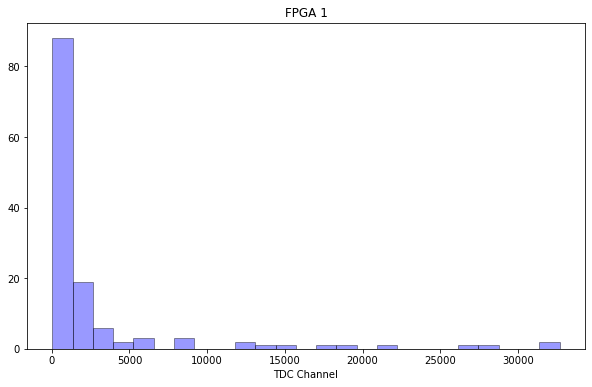

In [20]:
fig = plt.figure(figsize=(10, 6)) # create the figure
h, bins, _ = plt.hist(fpga1, bins=25, color='blue',edgecolor='black', alpha=0.4) # create and plot the histogram
ax = fig.axes[0]
ax.set(xlabel='TDC Channel', title='FPGA 1')
